<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# TASK 1: Become familiar with the dataset

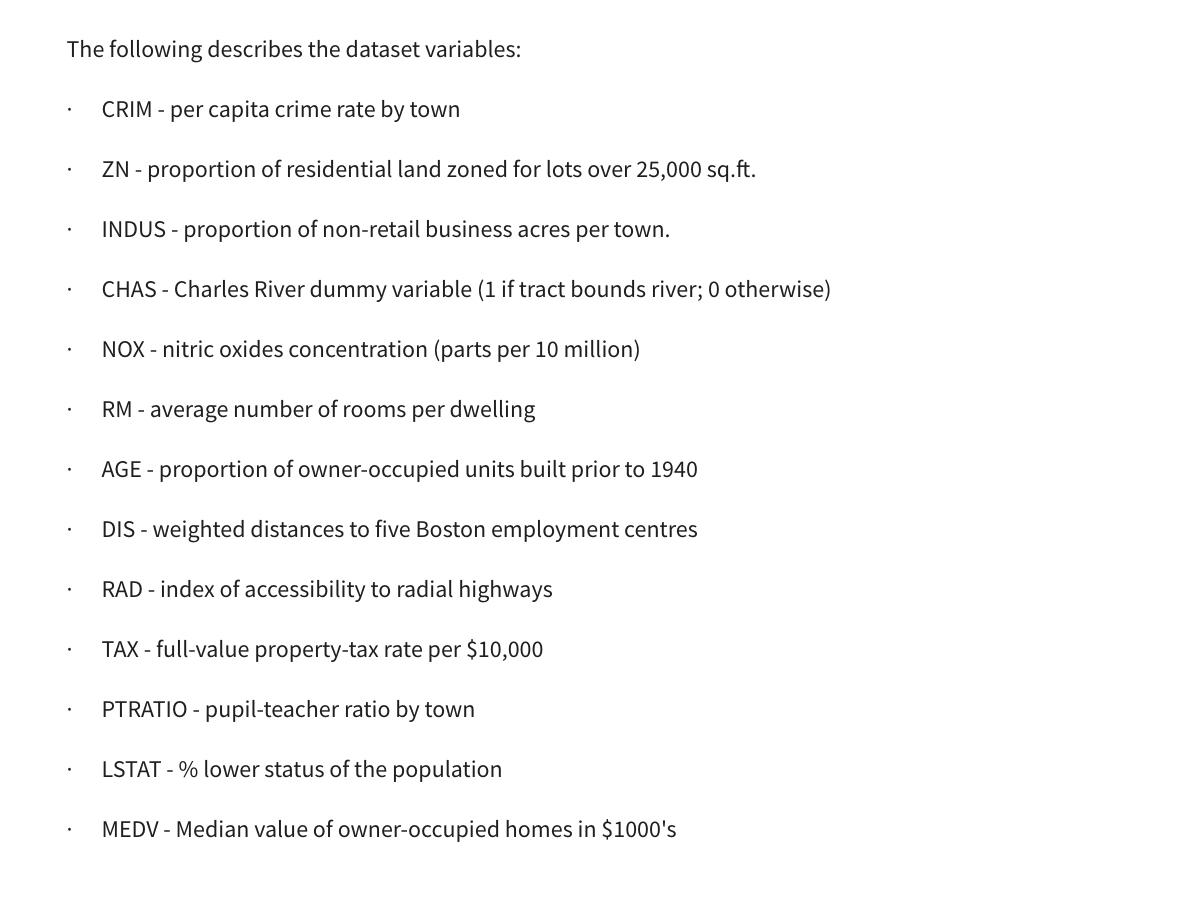

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# TASK 2: Generate Descriptive Statistics and Visualizations

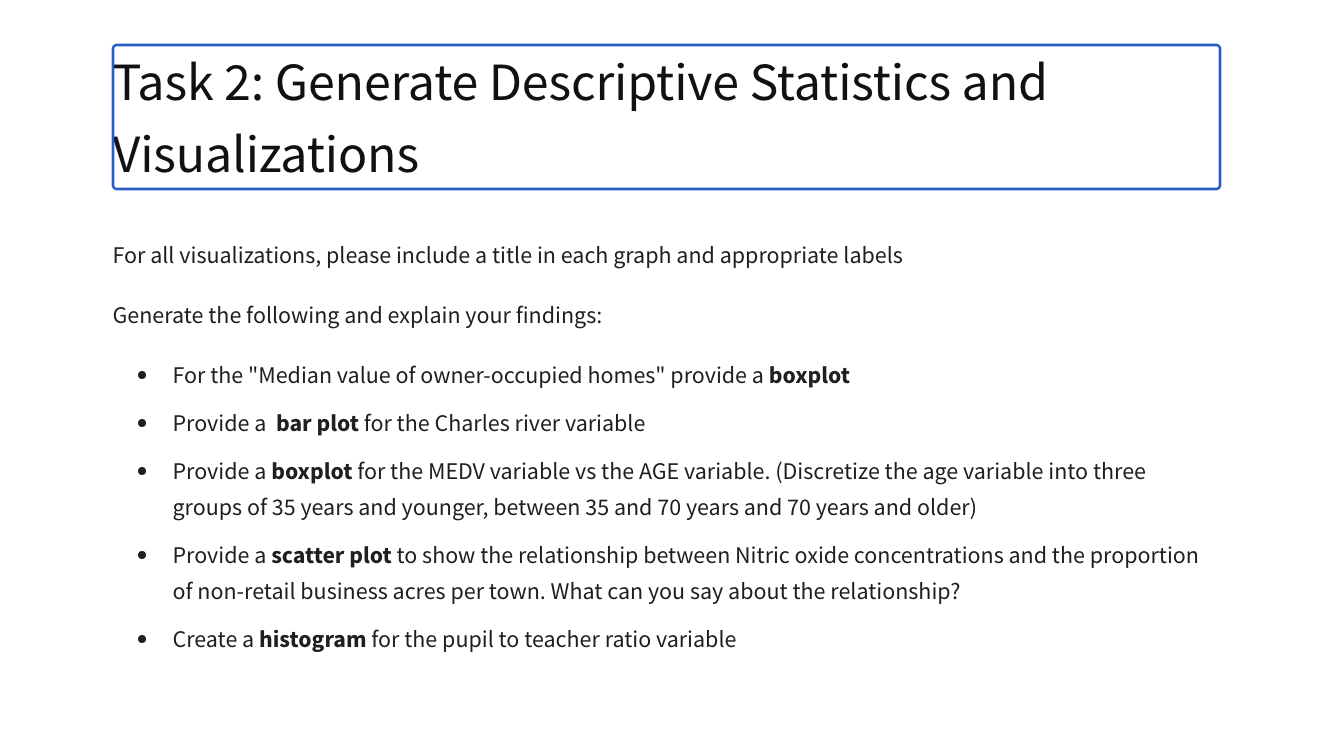

<Axes: ylabel='MEDV'>

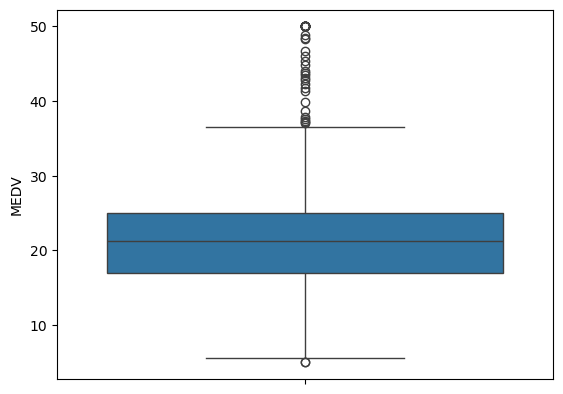

In [8]:
sns.boxplot(data=boston_df.MEDV)

In [12]:
boston_df.groupby('CHAS')['CHAS'].count()

CHAS
0.0    471
1.0     35
Name: CHAS, dtype: int64

In [15]:
import matplotlib.pyplot as plt

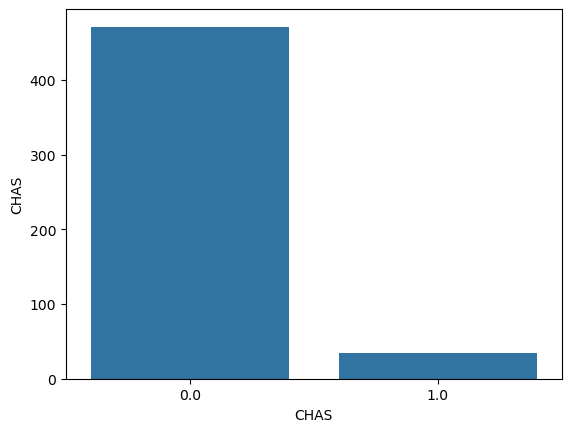

In [16]:
sns.barplot(data=boston_df.groupby('CHAS')['CHAS'].count())

plt.show()

In [23]:
younger_than_35 = boston_df[(boston_df.AGE <= 35)]['AGE']
between_35_70 = boston_df[(boston_df.AGE > 35) & (boston_df.AGE < 70)]['AGE']
over_70 = boston_df[boston_df.AGE >= 70]['AGE']

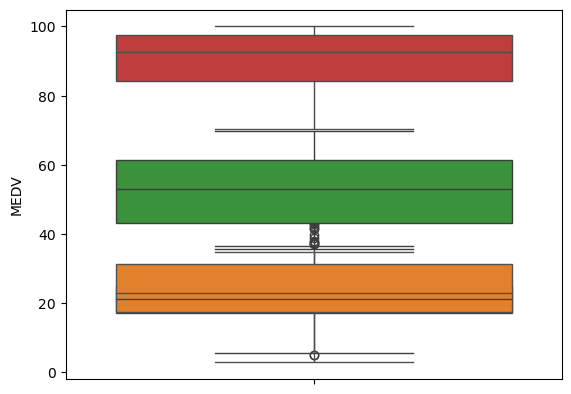

In [25]:
sns.boxplot(data=boston_df.MEDV)
sns.boxplot(data=younger_than_35)
sns.boxplot(data=between_35_70)
sns.boxplot(data=over_70)
plt.show()

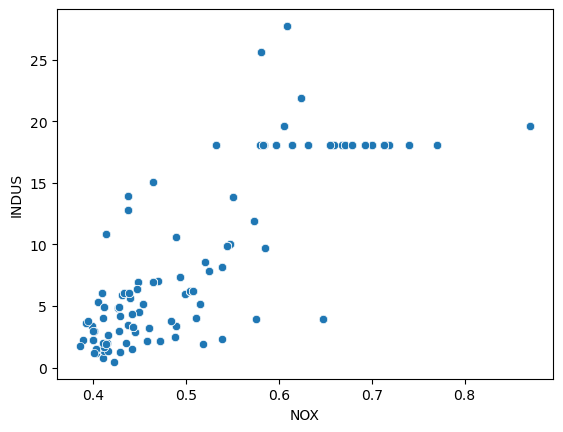

In [27]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')

plt.show()

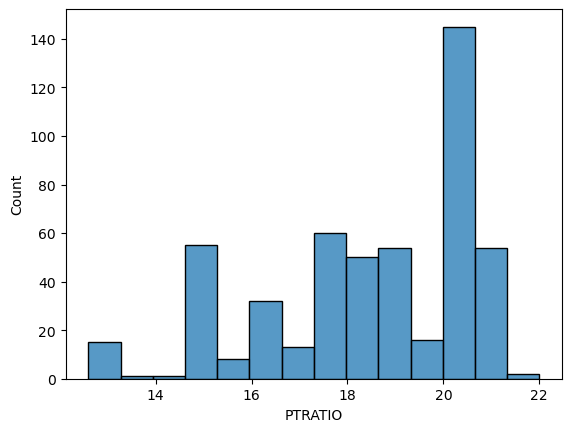

In [28]:
sns.histplot(data=boston_df, x='PTRATIO')
plt.show()

# TASK 3: Use the appropriate tests to answer the questions provided

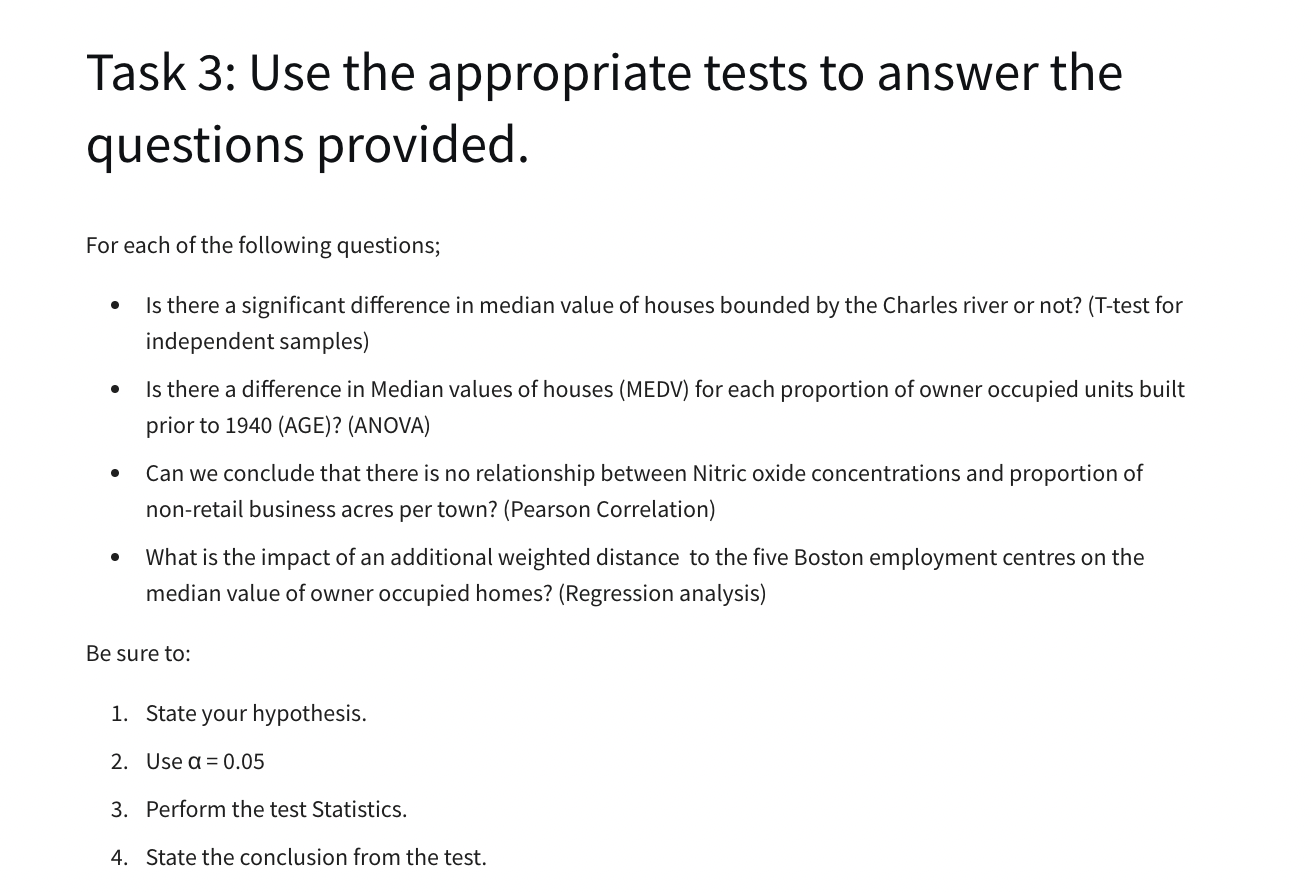

In [30]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [29]:
from scipy import stats
import numpy as np

Null hypothesis: there is no significant difference in median value of houses bounded by the Charles river
Alternative hypothesis: there is indeed significant difference in median value of houses bounded by the Charles river

In [37]:
boston_df[(boston_df.CHAS == 1.0)]['MEDV']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [38]:
t_stat, p_value = stats.ttest_1samp(boston_df[(boston_df.CHAS == 1.0)]['MEDV'], boston_df.MEDV.mean())

In [39]:
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: 2.957
P-value: 0.006


Since p-value is 0.006 > 0.05, therefore we cannot reject the null hypothesis. Thus, there is no significant diffence in median value of houses bounded by the Charles river.

Null hypothesis: there is no difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
alternative hypothesis: there is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.

In [40]:
f_stat, p_value = stats.f_oneway(younger_than_35, between_35_70, over_70)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

F-statistic: 2162.994
P-value: 0.000


Since the p-value is extremely small < 0.05, we can safely reject the null hypothesis.

In [47]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats import anova

In [48]:
# Correct OLS regression with formula
model = smf.ols('MEDV ~ DIS', data=boston_df).fit()

# ANOVA table
table = anova.anova_lm(model)
print(table)

             df        sum_sq      mean_sq         F        PR(>F)
DIS         1.0   2668.246572  2668.246572  33.57957  1.206612e-08
Residual  504.0  40048.048843    79.460414       NaN           NaN


Since p-valiue is extremely small, thus we can reject the null hypothesis. Conclusion: DIS has a statistically significant effect on MEDV.